# Дмитриев Никита
## Практика №1

In [1]:
from dmitriev import plot_density, print_statisics, measure_time, plot_density_for_bad_params
%pylab inline

Populating the interactive namespace from numpy and matplotlib


* ### Задание 1

Найдем математические ожидания и дисперсии априорных распределений для всех параметров $a$, $b$, $c$, $d$ второй модели:

$$\mathbb{E}(a) = \frac{a_{max} + a_{min}}{2} = \frac{90 + 75}{2} = 82,5$$

$$\mathbb{D}(a) = \frac{(a_{max} - a_{min} + 1)^2 - 1}{12} = \frac{(90 - 75 + 1)^2 - 1}{12} = 21,25$$

$$\mathbb{E}(b) = \frac{b_{max} + b_{min}}{2} = \frac{600 + 500}{2} = 550$$

$$\mathbb{D}(b) = \frac{(b_{max} - b_{min} + 1)^2 - 1}{12} = \frac{(600 - 500)^2}{12} = 850$$

Для того, что бы найти эти же статистики для $c$ и $d$ воспользуемся формулами связи полного и условного математического ожидания и дисперсии:

$$ \mathbb{E}(\xi) = \mathbb{E}(\mathbb{E}(\xi | a_1, a_2, ...)) $$
$$ \mathbb{D}(\xi) = \mathbb{E}(\mathbb{D}(\xi | a_1, a_2, ...)) + \mathbb{D}(\mathbb{E}(\xi | a_1, a_2, ...)) $$

В итоге получим:

$$\mathbb{E}(c) = \mathbb{E}(\mathbb{E}(c | a, b)) = \mathbb{E}(ap_1 + bp_2) = \\ = p_1\mathbb{E}(a) + p_2\mathbb{E}(b) = 0,1 * 82,5 + 0,01 * 550 = 13,75 $$

$$\mathbb{D}(c) = \mathbb{E}(\mathbb{D}(c | a, b)) + \mathbb{D}(\mathbb{E}(c | a, b)) = \mathbb{E}(ap_1 + bp_2) + \mathbb{D}(ap_1 + bp_2) = \\ = p_1\mathbb{E}(a) + p_2\mathbb{E}(b) + {p_1}^2\mathbb{D}(a) + {p_2}^2\mathbb{D}(b)) = \\ = 0,1 * 82,5 + 0,01 * 550 + 0,01 * 21,25 + 0,0001 * 850 = 14,05$$

$$\mathbb{E}(d) = \mathbb{E}(\mathbb{E}(d | c)) = \mathbb{E}(c + cp_3) = \mathbb{E}(c) + p_3\mathbb{E}(c) = \\ = 13,75 + 0,3 * 13,75 = 17,88 $$

$$\mathbb{D}(d) = \mathbb{E}(\mathbb{D}(d | c)) + \mathbb{D}(\mathbb{E}(d | c)) = \mathbb{E}(cp_3(1-p_3)) + \mathbb{D}(c + cp_3) = \\ = p_3(1-p_3)\mathbb{E}(c) + (1 + p_3)^2\mathbb{D}(c) = \\ = 0,3 * 0,7 * 13,75 + 1,3^2 * 14,05 = 26,63$$

Теперь проделаем все тоже самое для первой модели. Так как величины $a$ и $b$ распределены так же - их математическое ожидание и дисперсия не поменяются. Поэтому вычислим только $c$ и $d$:

$$\mathbb{E}(c) = \mathbb{E}(\mathbb{E}(c | a, b)) = \mathbb{E}(ap_1 + bp_2) = p_1\mathbb{E}(a) + p_2\mathbb{E}(b) = \\ = 0,1 * 82,5 + 0,01 * 550 = 13,75 $$

$$\mathbb{D}(c) = \mathbb{E}(\mathbb{D}(c | a, b)) + \mathbb{D}(\mathbb{E}(c | a, b)) = \mathbb{E}(ap_1(1-p_1) + bp_2(1 - p_2)) + \mathbb{D}(ap_1 + bp_2) = \\ = p_1(1-p_1)\mathbb{E}(a) + p_2(1 - p_2)\mathbb{E}(b) + {p_1}^2\mathbb{D}(a) + {p_2}^2\mathbb{D}(b)) = \\ = 0,1 * 0,9 * 82,5 + 0,01 * 0,99 * 550 + 0,01 * 21,25 + 0,0001 * 850 = 13,17$$

$$\mathbb{E}(d) = \mathbb{E}(\mathbb{E}(d | c)) = \mathbb{E}(c + cp_3) = \mathbb{E}(c) + p_3\mathbb{E}(c) = \\ = 13,75 + 0,3 * 13,75 = 17,88 $$

$$\mathbb{D}(d) = \mathbb{E}(\mathbb{D}(d | c)) + \mathbb{D}(\mathbb{E}(d | c)) = \mathbb{E}(cp_3(1-p_3)) + \mathbb{D}(c + cp_3) = \\ = p_3(1-p_3)\mathbb{E}(c) + (1 + p_3)^2\mathbb{D}(c) = \\ = 0,3 * 0,7 * 13,75 + 1,3^2 * 13,17 = 25,14$$

Итого получим:

| |$\mathbb{E}a$|$\mathbb{D}a$|$\mathbb{E}b$|$\mathbb{D}b$|$\mathbb{E}c$|$\mathbb{D}c$|$\mathbb{E}d$|$\mathbb{D}d$
|----|-|-|
|Модель 1|82,5|21,25|550|850|13,75|13,17|17,88|25,14|
|Модель 2|82,5|21,25|550|850|13,75|14,05|17,88|26,63|


* ### Задание 2

Выпишем формулы плотностей для второй модели:

$$p(b) = \frac{1}{b_{max} - b_{min} + 1}$$

Так как величины $a$ и $b$ независимы, то

$$p(b|a) = p(b) = \frac{1}{b_{max} - b_{min} + 1}$$

Найдем вспомогательные плотности для подсчета $p(b|d)$:

$$p(c) = \sum_{a, b}{p(c|a, b)p(a)p(b)} = \sum_{a, b}{\frac{(ap_1 + bp_2)^2}{c!}e^{-ap_1 -bp_2}}p(a)p(b)$$
$$p(d) = \sum_{c}{p(d|c)p(c)} = \sum_{c}{C_{c}^{d-c}p_3^{d-c}(1-p_3)^{2c-d}p(c)}$$
$$p(d|b) = \sum_{c}{p(d|c)p(c|b)} = \sum_{c}{p(d|c)\sum_{a}{p(c|a, b)p(a)}}$$

После того, как мы нашли все необходимые плотности, то можем по следующей формуле найти $p(b|d):$

$$p(b|d) = \frac{p(d|b)p(b)}{p(d)}$$

Найдем вспомогательные плотности для подсчета $p(b|d)$:

$$p(d|a, b) = \sum_{c}{p(d|c)p(c|a, b)}$$
$$p(d|a) = \sum_{c}{p(d|c)p(c|a)} = \sum_{c}{p(d|c)\sum_{b}{p(c|a, b)p(b)}}$$

После того, как мы нашли все необходимые плотности, то можем по следующей формуле найти $p(b|a, d):$

$$p(b|a, d) = \frac{p(d| a, b)p(b)}{p(d|a)}$$

Теперь построим граффики требуемых плотностей для обеих моделей:

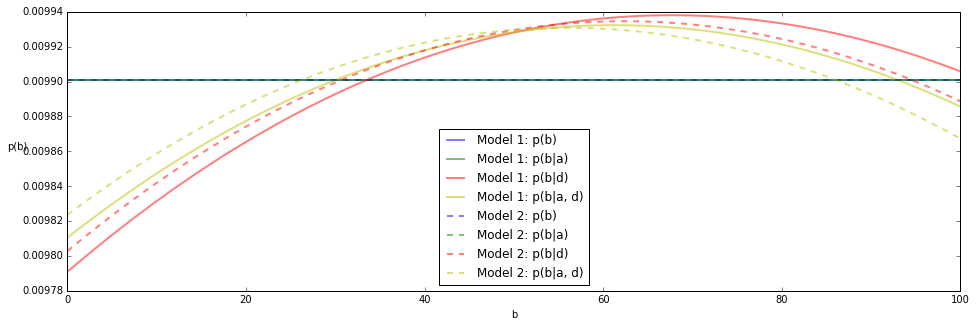

In [2]:
plot_density()

И посмотрим на математические ожидания и дисперсии:

In [2]:
print_statisics()

Model 1
p(b): E = 550.0 , D = 850.0
p(b|a): E = 550.0 , D = 850.0
p(b|d): E = 550.07267559 , D = 848.037891839
p(b|a, d): E = 550.036346893 , D = 848.031125546
Model 2
p(b): E = 550.0 , D = 850.0
p(b|a): E = 550.0 , D = 850.0
p(b|d): E = 550.09777976 , D = 848.128027454
p(b|a, d): E = 550.063479614 , D = 848.123112071


Уточнение прогноза происодит, так как с добавлением новой информации дисперсия становится меньше. Так же видно, что при заданных параметрах вторая модель достаточно хорошо приближает первую. Внешний вид плотностей очень похож, да и значения соответствующих статистик так же отличается не очень сильно. Из чего можно сделать вывод, что приближением пользоваться можно.

* ### Задание 3

Сначала ответим на заданный вопрос для второй модели:

Найдем $\mathbb{D}(c|b):$

$$\mathbb{D}(c|b) = \mathbb{E}_a(\mathbb{D}(c|a, b)) + \mathbb{D}_a(\mathbb{E}(c|a, b)) = \\ = \mathbb{E}_a(ap_1 + bp_2) + \mathbb{D}_a(ap_1+bp_2) = p_1\mathbb{E}(a) + p_2b + p_1^2\mathbb{D}(a)$$

Аналогично получим $\mathbb{D}(c|a)$.

$$ \mathbb{D}(c|a) = p_2\mathbb{E}(b) + p_1a + p_2^2\mathbb{D}(b) $$

$$ \mathbb{D}(c|b) = p_1\mathbb{E}(a) + p_2b + p_1^2\mathbb{D}(a) $$

Посмотрим какое множество точек у нас получилось:

$$ \mathbb{D}(c|a) - \mathbb{D}(c|b) > 0 \\ p_2\mathbb{E}(b) + p_1a + p_2^2\mathbb{D}(b) - p_1\mathbb{E}(a) - p_2b - p_1^2\mathbb{D}(a) > 0 \\ a_{11}p_1^2 + a_{22}p_2^2 + 2a_{13}p_1 + 2a_{23}p_2 > 0 \ \text{, где}$$

$$a_{11} = \mathbb{D}(a),\ a_{22} = -\mathbb{D}(b),\ a_{13} = \frac{1}{2}(\mathbb{E}(a) - a),\\ a_{23} = -\frac{1}{2}(\mathbb{E}(b) - b),\ a_{12} = a_{33} = 0 $$

Так как в качестве $a$ и $b$ мы берем математические ожидания своих априорных распределений, округленных до ближайшего целого, то $a_{23} = 0$, $a_{13} < 0$.

Получили уравнение гиперболы, так как

$$\begin{vmatrix} a_{11} & a_{12} \\ a_{12} & a_{22} \end{vmatrix} < 0\ \text{и} \ \begin{vmatrix} a_{11} & a_{12} & a_{13} \\ a_{12} & a_{22} & a_{23} \\ a_{13} & a_{23} & a_{33}  \end{vmatrix} \neq 0$$

В итоге наше множество точек можно записать следующим неравенством:

$$ 21,25p_1^2 - 850p_2^2 - 0,5 p_1 > 0 $$

Так как разделяющая кривая получилась гипербола, можно сделать вывод, что множества $\{(p_1, p_2)|\mathbb{D}(c|b) < \mathbb{D}(c|a)\}$ и $\{(p_1, p_2)|\mathbb{D}(c|b) \ge \mathbb{D}(c|a)\}$ во второй модели не линейно разделимы.

Теперь рассмотрим первую модель:

$$\mathbb{D}(c|b) = \mathbb{E}_a(\mathbb{D}(c|a, b)) + \mathbb{D}_a(\mathbb{E}(c|a, b)) = \\ = \mathbb{E}_a(ap_1(1-p_1) + bp_2(1-p_2)) + \mathbb{D}_a(ap_1+bp_2) = \\ = p_1(1-p_1)\mathbb{E}(a) + p_2(1-p_2)b + p_1^2\mathbb{D}(a) = \\ = (\mathbb{D}(a) - \mathbb{E}(a))p_1^2 - bp_2^2 + \mathbb{E}(a)p_1 + bp_2$$

Аналогично получим $\mathbb{D}(c|a)$.

$$ \mathbb{D}(c|a) = (\mathbb{D}(b) - \mathbb{E}(b))p_2^2 - ap_1^2 + \mathbb{E}(b)p_2 + ap_1 $$

$$ \mathbb{D}(c|b) = (\mathbb{D}(a) - \mathbb{E}(a))p_1^2 - bp_2^2 + \mathbb{E}(a)p_1 + bp_2 $$

Посмотрим какое множество точек у нас получилось:

$$ \mathbb{D}(c|a) - \mathbb{D}(c|b) > 0 \\ a_{11}p_1^2 + a_{22}p_2^2 + 2a_{13}p_1 + 2a_{23}p_2 > 0 \ \text{, где}$$

$$a_{11} = \mathbb{E}(a) - \mathbb{D}(a) - a,\ a_{22} = -(\mathbb{E}(b) - \mathbb{D}(b) - b), \\ a_{13} = -\frac{1}{2}(\mathbb{E}(a) - a),\ a_{23} = \frac{1}{2}(\mathbb{E}(b) - b),\ a_{12} = a_{33} = 0 $$

Так как в качестве $a$ и $b$ мы берем математические ожидания своих априорных распределений, округленных до ближайшего целого, то $a_{23} = 0$, $a_{13} > 0$.

Получили уравнение гиперболы, так как

$$\begin{vmatrix} a_{11} & a_{12} \\ a_{12} & a_{22} \end{vmatrix} < 0\ \text{и} \ \begin{vmatrix} a_{11} & a_{12} & a_{13} \\ a_{12} & a_{22} & a_{23} \\ a_{13} & a_{23} & a_{33}  \end{vmatrix} \neq 0$$

В итоге наше множество точек можно записать следующим неравенством:

$$ -21,75p_1^2 + 850p_2^2 + 0,5 p_1 > 0 $$

Так как разделяющая кривая получилась гипербола, можно сделать вывод, что множества $\{(p_1, p_2)|\mathbb{D}(c|b) < \mathbb{D}(c|a)\}$ и $\{(p_1, p_2)|\mathbb{D}(c|b) \ge \mathbb{D}(c|a)\}$ в первой модели так же не линейно разделимы.

* ### Задание 4

Теперь произведем временные замеры по оценке всех необходимых распределений:

In [2]:
measure_time()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,p(c),p(c|a),p(c|b),p(b|a),p(b|d),p(b|ad),p(d)
1,0.12,0.12,0.13,0.00014,0.69,0.65,0.26
2,0.24,0.014,0.0024,0.00015,0.85,0.31,0.39


* ### Задание 5

Разница между первой и второй моделью заключается в том, что вторая модель приближает первую. Но приближение это хорошо работает не всегда, а только при определенных условиях. А конкретно при условиях теоремы Пуассона, то есть колличество испытаний должно быть достаточно большим, а вероятность успеха, наоборот, достаточно малой. Давайте изменим параметры нашей модели так, что бы $p_1 = 0.99$, $p_2 = 0.99$ и посмотрим на графики соответствующих плоностей, а так же на дисперсии получившихся распределений:

D(p(c|a, b)) for model 1: 6.2667000037
D(p(c|a, b)) for model 2: 2916.57896338


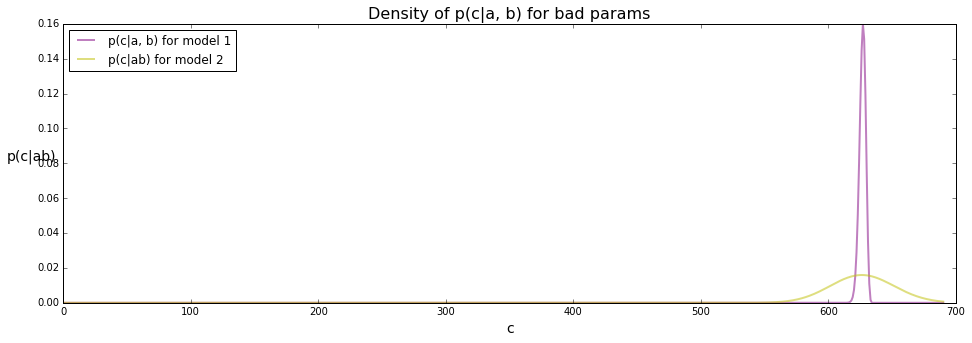

In [2]:
plot_density_for_bad_params()

Как можно увидеть распределения очень сильно отличаются. Это происходит, как говорилось выше, из-за нарушения условий теоремы Пуассона.